In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

2025-09-06 20:40:19.134358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-06 20:40:19.290046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-06 20:40:22.281898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
#Model Create
inputs = Input((28,28))
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

E0000 00:00:1757169627.744319   19614 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1757169627.775211   19614 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# Train Model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_split=0.1, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1183/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7184 - loss: 5.1170

KeyboardInterrupt: 


✅ Test Accuracy: 0.9579
313/313 [==============================] - 0s 1ms/step


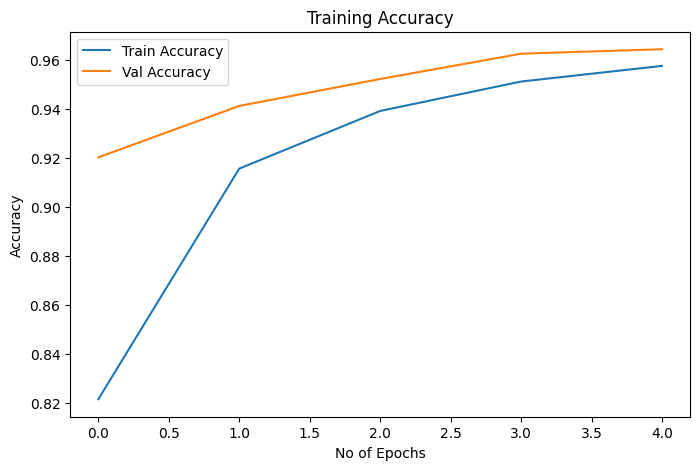

In [ ]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(testX, testY, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


# Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()


313/313 [==============================] - 0s 2ms/step


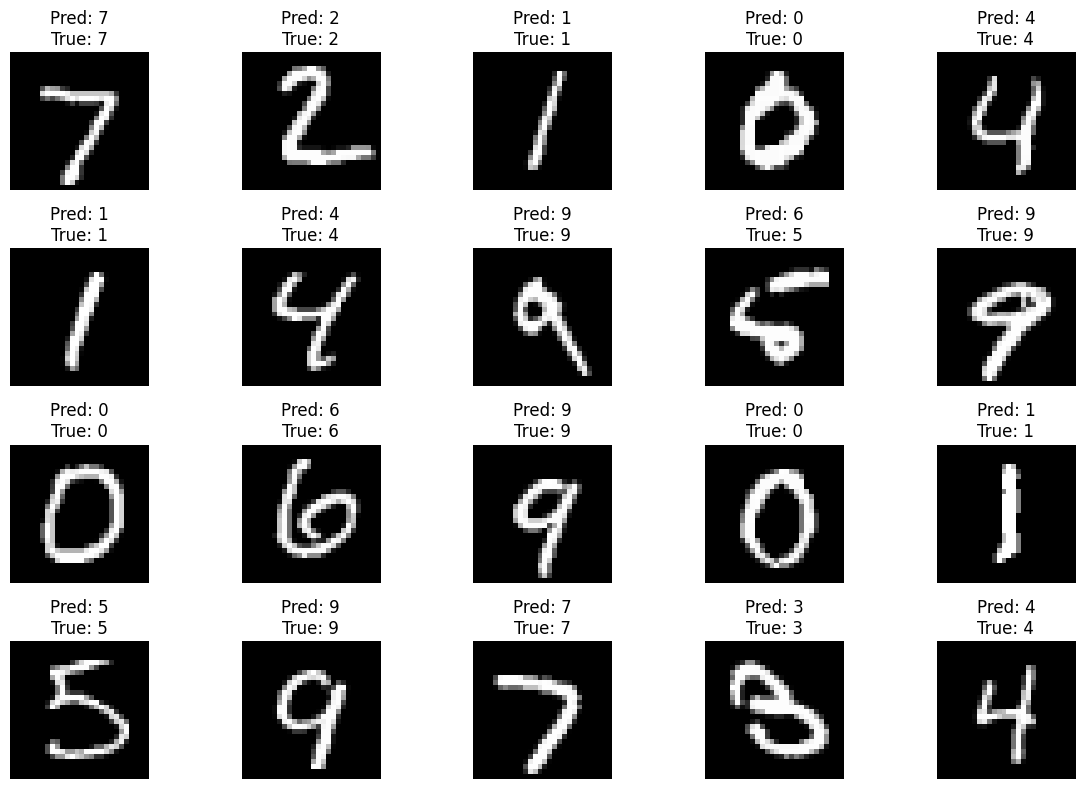

In [34]:
# Predict on test set
predictions = model.predict(testX)
predicted_labels = np.argmax(predictions, axis=1)

# Show 20 test images with predicted labels in a grid
plt.figure(figsize=(12, 8))

for i in range(20):
    plt.subplot(4, 5, i+1)  # 4 rows, 5 columns
    plt.imshow(testX[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {testY[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
